# Advanced Quadrature Implementations

In [60]:
import math
from importlib import reload

import matplotlib.pyplot as plt
import pickle
import numpy as np

from tqdm.notebook import tqdm

from adaptive_time import plot_utils
from adaptive_time import utils
from adaptive_time import run_lib
from adaptive_time.environments import cartpole2
from adaptive_time import value_est
from adaptive_time.value_est import approx_integrators

from pprint import pprint

approx_integrators = reload(approx_integrators)
run_lib = reload(run_lib)
cartpole2 = reload(cartpole2)
value_est = reload(value_est)
plot_utils = reload(plot_utils)
utils = reload(utils)

/Users/szepi1991/Code/adaptive_time/.venv/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment CartPole-OURS-v2 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


## Prepare some data to test on

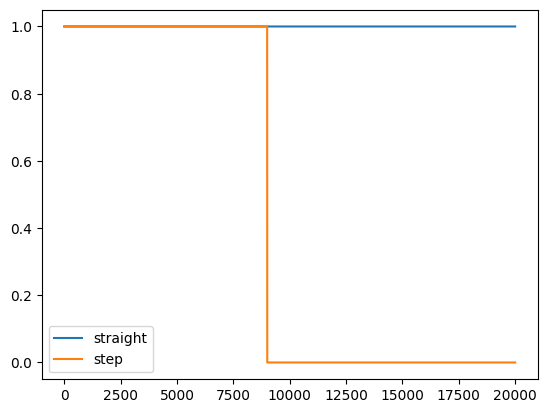

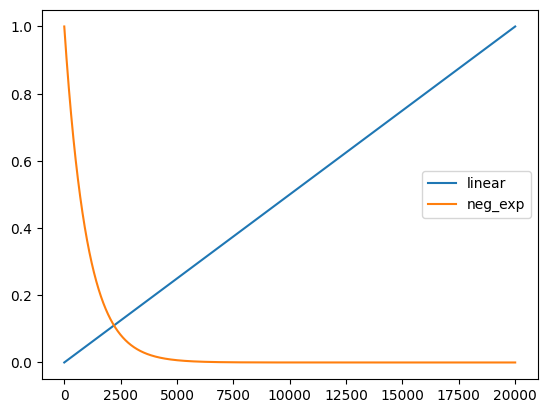

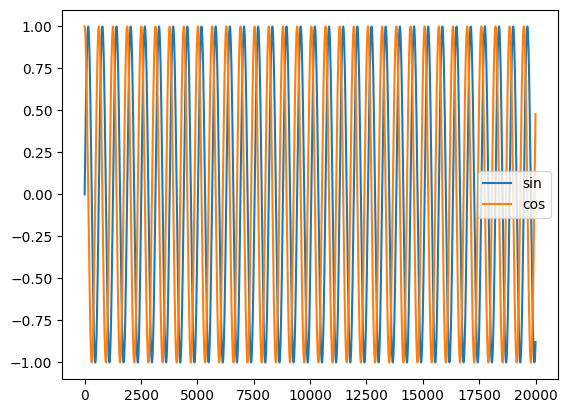

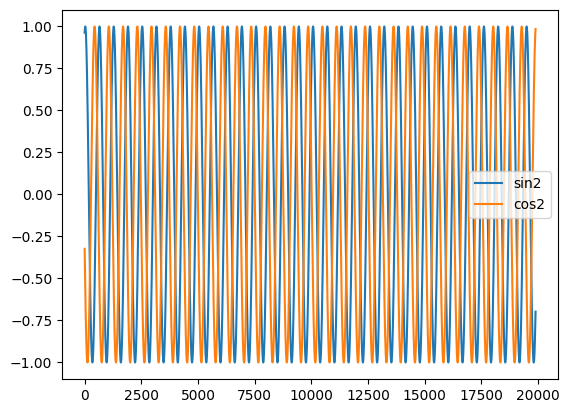

In [47]:
seed = 42

value_est.reset_randomness(seed, env=None)

data = {
    "straight": np.array([1] * 20_000),
    "step": np.array([1] * 9_000 + [0] * 11_000),
    "linear": np.arange(0, 20_000, 1) * 0.0001 / 2,
    "neg_exp": np.exp(-np.arange(0, 20, 0.001)),
    "sin": np.sin(np.arange(0, 200, 0.01)),
    "cos": np.cos(np.arange(0, 200, 0.01)),
    "sin2": np.sin(np.arange(1.3, 200.3, 0.01)),
    "cos2": np.cos(np.arange(1.9, 200.9, 0.01)),
}

for idx, (k, v) in enumerate(data.items()):
    if idx % 2 == 0:
        plt.figure()
    plt.plot(v, label=k)
    plt.legend()

In [48]:
true_integrals = {k: np.sum(v) for k, v in data.items()}
pprint(true_integrals)

{'cos': -87.07259580994176,
 'cos2': -111.40649854276533,
 'linear': 9999.5,
 'neg_exp': 1000.5000812711476,
 'sin': 51.717453803589905,
 'sin2': -44.77331462678737,
 'step': 9000,
 'straight': 20000}


## Samplers

In [61]:
unif_sampler_params = np.power(2, np.arange(0, 11, 2))
quad_sampler_params = np.concatenate(
    (np.array([0]), np.power(2, np.arange(-3.0, 10, 2))), axis=0
)

print('unif_sampler_params:', unif_sampler_params)
print('quad_sampler_params:', quad_sampler_params)

samplers_tried = {
    f'q{p}': approx_integrators.AdaptiveQuadratureIntegrator(tolerance=p)
    for p in quad_sampler_params
}
# samplers_tried.update({
#     f'u{p}': approx_integrators.UniformlySpacedIntegrator(p)
#     for p in unif_sampler_params
# })
samplers_tried.update({
    # f'qn{p}': AdaptiveQuadratureIntegratorNew(p)
    f'qn{p}': approx_integrators.AdaptiveQuadratureIntegratorNew(p)
    for p in quad_sampler_params
})


unif_sampler_params: [   1    4   16   64  256 1024]
quad_sampler_params: [0.00e+00 1.25e-01 5.00e-01 2.00e+00 8.00e+00 3.20e+01 1.28e+02 5.12e+02]


In [62]:
approx_integrals = {}
num_pivots = {}

for label, value_seq in tqdm(data.items()):
    print("data:", label)
    approx_integrals[label] = {}
    num_pivots[label] = {}
    for sampler_name, sampler in samplers_tried.items():
        if sampler_name != "qn2.0":
            continue
        integral, all_pivots = sampler.integrate(value_seq)
        approx_integrals[label][sampler_name] = integral
        num_pivots[label][sampler_name] = len(all_pivots)
    # approx_integrals[sampler_name] = np.array(approx_integrals[sampler_name])
    # num_pivots[sampler_name] = np.array(num_pivots[sampler_name])


  0%|          | 0/8 [00:00<?, ?it/s]

data: straight
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
data: step
looking at:  1 1 0 0
looking at:  1 1 1 0
looking at:  0 0 0 0
looking at:  1 1 1 0
looking at:  1 1 1 1
looking at:  1 1 1 0
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking at:  1 1 1 1
looking 

In [51]:

pprint(num_pivots)


{'cos': {'q0.0': 20000,
         'q0.125': 19446,
         'q0.5': 17901,
         'q128.0': 9,
         'q2.0': 11609,
         'q32.0': 199,
         'q512.0': 5,
         'q8.0': 405,
         'qn0.0': 34212,
         'qn0.125': 34212,
         'qn0.5': 34212,
         'qn128.0': 10592,
         'qn2.0': 33541,
         'qn32.0': 23081,
         'qn512.0': 47,
         'qn8.0': 30882},
 'cos2': {'q0.0': 19900,
          'q0.125': 19399,
          'q0.5': 15645,
          'q128.0': 13,
          'q2.0': 10095,
          'q32.0': 217,
          'q512.0': 7,
          'q8.0': 2975,
          'qn0.0': 34238,
          'qn0.125': 34238,
          'qn0.5': 33852,
          'qn128.0': 6204,
          'qn2.0': 33072,
          'qn32.0': 20825,
          'qn512.0': 75,
          'qn8.0': 32181},
 'linear': {'q0.0': 3,
            'q0.125': 3,
            'q0.5': 3,
            'q128.0': 3,
            'q2.0': 3,
            'q32.0': 3,
            'q512.0': 3,
            'q8.0': 3,
        

In [52]:
pprint(approx_integrals)


{'cos': {'q0.0': -87.07259580994217,
         'q0.125': -87.07182118011067,
         'q0.5': -87.07222735458296,
         'q128.0': 16412.46016840599,
         'q2.0': -87.0700288897697,
         'q32.0': 15793.856874650714,
         'q512.0': 16328.905131894973,
         'q8.0': 15798.000535565456,
         'qn0.0': -87.07259580994189,
         'qn0.125': -87.07259580994192,
         'qn0.5': -87.07259580994192,
         'qn128.0': -176.65845131010514,
         'qn2.0': -87.82826499295776,
         'qn32.0': -99.6206180136272,
         'qn512.0': -1999.370077500586,
         'qn8.0': -89.96645072142367},
 'cos2': {'q0.0': -111.40649854276539,
          'q0.125': -111.40649844775974,
          'q0.5': 1015.8348625881273,
          'q128.0': 10630.796661619039,
          'q2.0': 1015.8397175082837,
          'q32.0': 10486.939061078834,
          'q512.0': 10591.415536463217,
          'q8.0': 2627.7380453196865,
          'qn0.0': -111.40649854276502,
          'qn0.125': -111.40649854

## Plot the approximation qualities


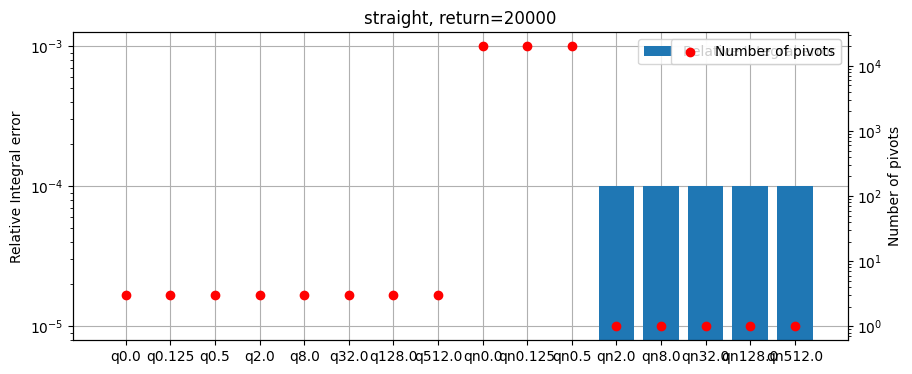

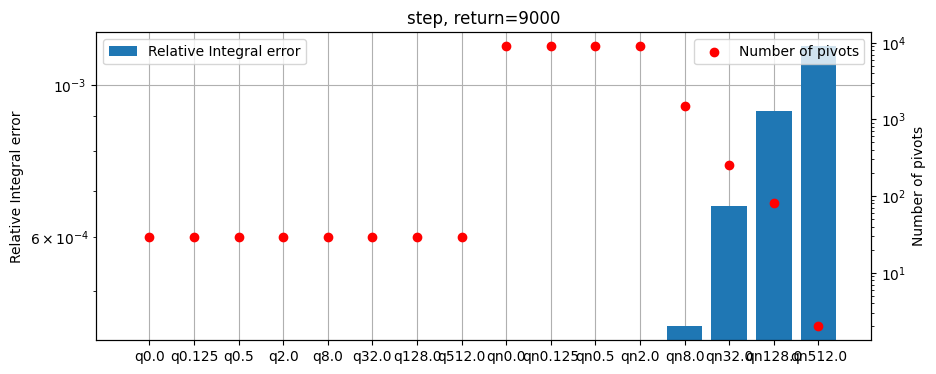

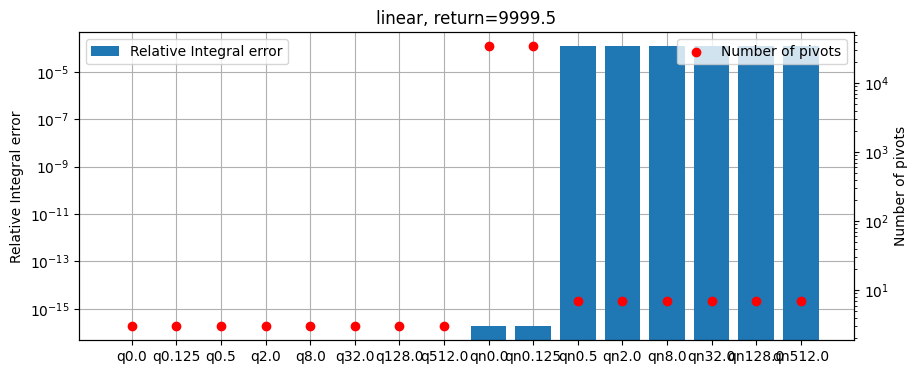

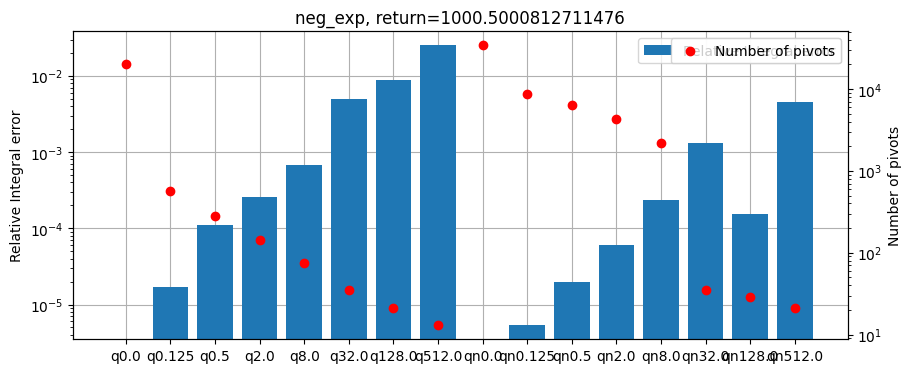

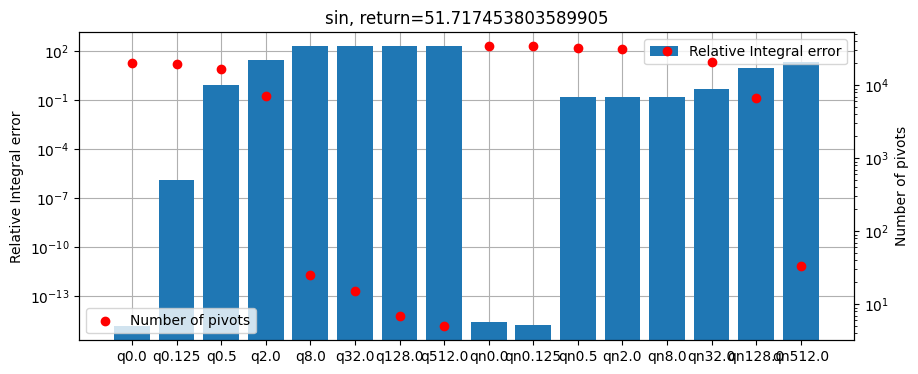

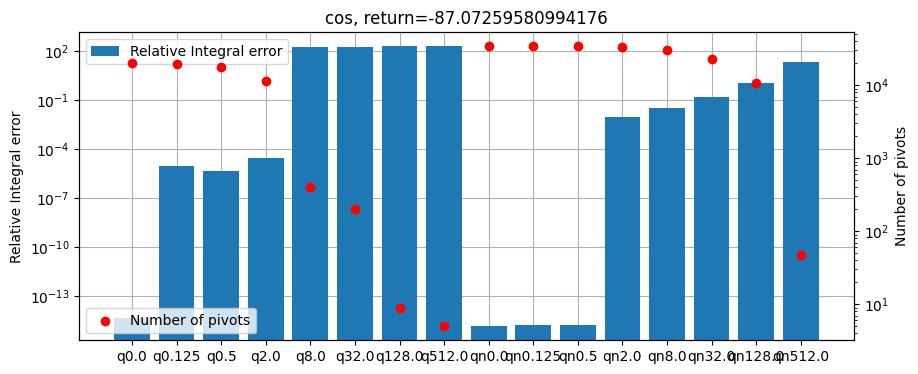

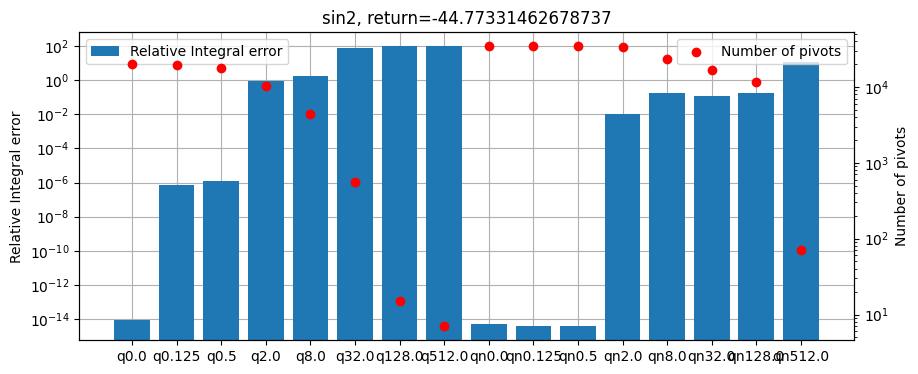

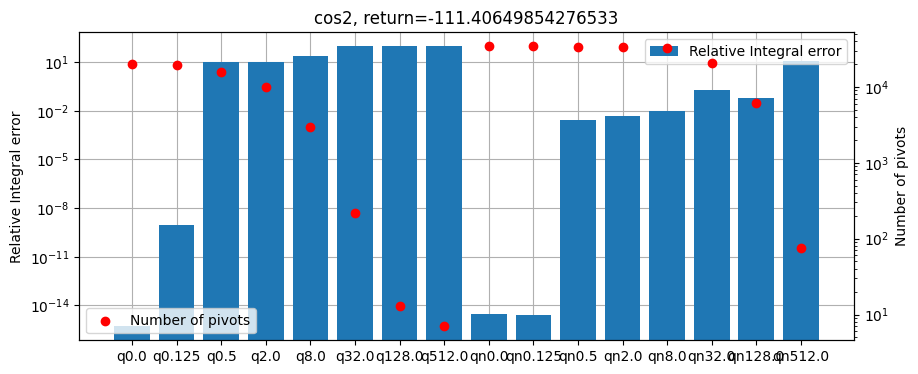

In [53]:
# Each data gets a different plot.
# -- on each plot, samplers go on the x-axes
# -- y-axes is the integral value error AND the number of pivots

all_abs_errs = {}
all_rel_errs = {}

for data_name in data.keys():
    plt.figure(figsize=(10, 4))
    plt.title(f"{data_name}, return={true_integrals[data_name]}")
    ax = plt.gca()
    ax.grid()
    ax.set_axisbelow(True)
    ax2 = ax.twinx()

    method_names = []
    errs = []
    num_pivots_ = []
    all_abs_errs[data_name] = {}
    all_rel_errs[data_name] = {}

    for sampler_name, sampler in samplers_tried.items():
        method_names.append(sampler_name)
        abs_err = abs(true_integrals[data_name] - approx_integrals[data_name][sampler_name])
        rel_err = abs_err / abs(true_integrals[data_name])
        all_rel_errs[data_name][sampler_name] = rel_err
        all_abs_errs[data_name][sampler_name] = abs_err
        errs.append(rel_err)
        num_pivots_.append(num_pivots[data_name][sampler_name])
    ax.bar(method_names, errs, label="Relative Integral error")
    ax2.scatter(method_names, num_pivots_, label="Number of pivots", color="red")
    # ax2.hlines(5, -1, len(method_names), color="gray", linestyle="--")
    ax.set_yscale("log")
    # ax.set_yticks([20, 200, 500])
    # ax.set_ylim(0, 200_000)
    ax2.set_yscale("log")
    ax.set_ylabel("Relative Integral error")
    ax2.set_ylabel("Number of pivots")
    # plt.yscale("log")
    # plt.legend()
    ax.legend(loc=0)
    ax2.legend()

## In-depth explore

In [54]:
# all_abs_errs
# all_rel_errs

data_name = "straight"

pprint(approx_integrals[data_name])


{'q0.0': 20000.0,
 'q0.125': 20000.0,
 'q0.5': 20000.0,
 'q128.0': 20000.0,
 'q2.0': 20000.0,
 'q32.0': 20000.0,
 'q512.0': 20000.0,
 'q8.0': 20000.0,
 'qn0.0': 20000,
 'qn0.125': 20000,
 'qn0.5': 20000,
 'qn128.0': 19998.0,
 'qn2.0': 19998.0,
 'qn32.0': 19998.0,
 'qn512.0': 19998.0,
 'qn8.0': 19998.0}


In [55]:
pprint(num_pivots[data_name])

{'q0.0': 3,
 'q0.125': 3,
 'q0.5': 3,
 'q128.0': 3,
 'q2.0': 3,
 'q32.0': 3,
 'q512.0': 3,
 'q8.0': 3,
 'qn0.0': 20000,
 'qn0.125': 20000,
 'qn0.5': 20000,
 'qn128.0': 1,
 'qn2.0': 1,
 'qn32.0': 1,
 'qn512.0': 1,
 'qn8.0': 1}


In [56]:
# all_abs_errs
# all_rel_errs

pprint(all_abs_errs["cos2"])
pprint(all_rel_errs["cos2"])


{'q0.0': 5.684341886080802e-14,
 'q0.125': 9.500558917352464e-08,
 'q0.5': 1127.2413611308925,
 'q128.0': 10742.203160161804,
 'q2.0': 1127.246216051049,
 'q32.0': 10598.345559621599,
 'q512.0': 10702.822035005982,
 'q8.0': 2739.144543862452,
 'qn0.0': 3.126388037344441e-13,
 'qn0.125': 2.7000623958883807e-13,
 'qn0.5': 0.28416645437140176,
 'qn128.0': 7.15503227178435,
 'qn2.0': 0.566306451342939,
 'qn32.0': 21.002391802649456,
 'qn512.0': 1304.9764486242261,
 'qn8.0': 1.1190431164841925}
{'q0.0': 5.102343185033113e-16,
 'q0.125': 8.527831896364204e-10,
 'q0.5': 10.118272954231491,
 'q128.0': 96.42348786357576,
 'q2.0': 10.118316532660218,
 'q32.0': 95.13220232438451,
 'q512.0': 96.06999748670421,
 'q8.0': 24.58693684561842,
 'qn0.0': 2.8062887517682123e-15,
 'qn0.125': 2.423613012890729e-15,
 'qn0.5': 0.0025507170415406196,
 'qn128.0': 0.06422455032134203,
 'qn2.0': 0.005083244323719162,
 'qn32.0': 0.18852034735287296,
 'qn512.0': 11.713647459472824,
 'qn8.0': 0.010044684386652977}


In [57]:
approx_integrals["cos2"]

{'q0.0': -111.40649854276539,
 'q0.125': -111.40649844775974,
 'q0.5': 1015.8348625881273,
 'q2.0': 1015.8397175082837,
 'q8.0': 2627.7380453196865,
 'q32.0': 10486.939061078834,
 'q128.0': 10630.796661619039,
 'q512.0': 10591.415536463217,
 'qn0.0': -111.40649854276502,
 'qn0.125': -111.40649854276506,
 'qn0.5': -111.12233208839393,
 'qn2.0': -110.8401920914224,
 'qn8.0': -112.52554165924953,
 'qn32.0': -132.4088903454148,
 'qn128.0': -104.25146627098098,
 'qn512.0': -1416.3829471669915}